In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### data loading

In [2]:
# load data
df = pd.read_csv('../Data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


________________________________
### data survey
- look for missing values
- look for null entries

In [3]:
# check for duplicated entries
print('duplicated entries: {}'.format(df.duplicated().sum()))

duplicated entries: 0


In [4]:
# Get all the info about the dataframe
df.info()
# There are 891 entries. The Age colums has 714 entries and the Cabin column has 204 entries.
# Embarked has 2 missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# separate the categorical and numerical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :', cat_col)
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns: ', num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [6]:
# number of non-unique entries in the categorical columns
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [7]:
# the unique ticket entries
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [8]:
# drop Name and Ticket
df1 = df.drop(columns = ['Name', 'Ticket'])
print('shape after dropping Name and Ticket: {}'.format(df1.shape))
df1.head()

# the percentage of missing values in the dataframe for each column
round((df1.isnull().sum()/df1.shape[0])*100,2)

shape after dropping Name and Ticket: (891, 10)


PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [9]:
# drop the nulls in the Embarked column
df2 = df1.drop(columns = ['Cabin'])
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

_________________________________
### data cleaning
- fill the missing values in the Age column

In [10]:
df3 = df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Make some plots to check for outliers

The image explains how box plots work:

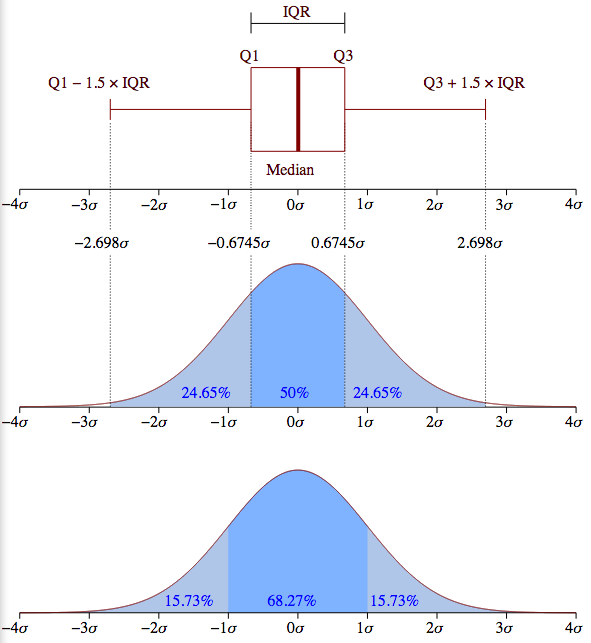

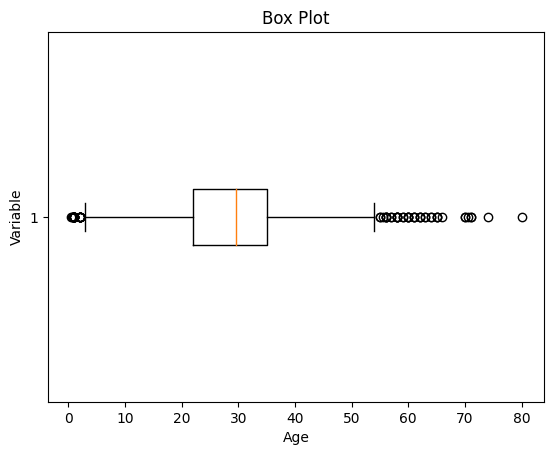

In [11]:
plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [12]:
# determining the lower and upper bounds for outliers (Try both std*2 and std*3)
n_sigma = 2
mean = df3['Age'].mean()
std = df3['Age'].std()
lower_bound = max(0, mean - std*n_sigma) # to avoid going below 0
upper_bound = mean + std*n_sigma
print('Lower Bound: ',lower_bound)
print('Upper Bound: ',upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]
df4.info()

Lower Bound:  3.7054001079256587
Upper Bound:  55.57878528533277
<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  821 non-null    int64  
 1   Survived     821 non-null    int64  
 2   Pclass       821 non-null    int64  
 3   Sex          821 non-null    object 
 4   Age          821 non-null    float64
 5   SibSp        821 non-null    int64  
 6   Parch        821 non-null    int64  
 7   Fare         821 non-null    float64
 8   Embarked     821 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 64.1+ KB


_____________________________
### scaling the data

In [13]:
X = df4[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']].copy()
Y = df4['Survived'].copy()

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
df5 = X
df5[num_col_] = scaler.fit_transform(df5[num_col_])
df5.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S
